In [ ]:
!pip install -U skrub --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Preparación de datos
import numpy as np
import pandas as pd
# Misc
from warnings import filterwarnings

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from skrub import SimilarityEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML3/Producción_Cultivos_ProductosGanaderia_S_Todos_los_Datos_NOFLAG.csv", sep=',', encoding='latin-1')


In [ ]:
df

,Código del área,Código del área (M49),Área,Código del producto,Código del producto (CPC),Producto,Código del elemento,Elemento,Unidad,Y1961,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afganistán,268,'21631.01,"Aceite de girasol, en bruto",5510,Producción,toneladas,2.937750e+03,...,1.376800e+02,9.604600e+02,1.035280e+03,1.804720e+03,3.167460e+03,3.198890e+03,3.130580e+03,2.511670e+03,2.013480e+03,NaN
1,2,'004,Afganistán,290,'21691.07,Aceite de sésamo,5510,Producción,toneladas,2.252800e+03,...,1.333760e+03,1.250000e+03,8.608900e+02,1.042590e+03,1.107840e+03,1.210550e+03,1.407670e+03,2.348420e+03,2.096560e+03,NaN
2,2,'004,Afganistán,331,'2168,"Aceite, algodón",5510,Producción,toneladas,4.997350e+03,...,4.761860e+03,4.832280e+03,5.690840e+03,6.625930e+03,4.176030e+03,6.520000e+03,8.247330e+03,8.349080e+03,8.199220e+03,NaN
3,2,'004,Afganistán,334,'21691.12,"Aceite, linaza",5510,Producción,toneladas,3.531240e+03,...,7.335700e+02,7.900000e+02,5.374630e+03,1.831561e+04,1.969771e+04,2.518083e+04,2.718553e+04,1.598286e+04,8.987860e+03,NaN
4,2,'004,Afganistán,261,'2167,"Aceite, oliva",5510,Producción,toneladas,8.160000e+01,...,5.459300e+02,6.584200e+02,7.113700e+02,7.409000e+02,7.632500e+02,8.121600e+02,8.332500e+02,7.240900e+02,7.282300e+02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79601,5817,'902,Import netos alim en Des,1745,'F1745,Queso (Todos tipos),5510,Producción,toneladas,2.917480e+05,...,1.448935e+06,1.476524e+06,1.483218e+06,1.476686e+06,1.500472e+06,1.525235e+06,1.416998e+06,1.418938e+06,1.331697e+06,NaN
79602,5817,'902,Import netos alim en Des,1720,'F1720,"Raíces&Tubérculos, total",5312,Área cosechada,ha,6.893267e+06,...,1.957011e+07,1.945307e+07,1.994979e+07,2.065808e+07,2.155702e+07,2.182914e+07,2.152827e+07,2.259705e+07,2.296227e+07,23794038.0
79603,5817,'902,Import netos alim en Des,1720,'F1720,"Raíces&Tubérculos, total",5419,Rendimiento,100 g/ha,5.224200e+04,...,9.380400e+04,9.398600e+04,9.428700e+04,9.330100e+04,9.169300e+04,9.657700e+04,9.958700e+04,9.785400e+04,1.005800e+05,101281.0
79604,5817,'902,Import netos alim en Des,1720,'F1720,"Raíces&Tubérculos, total",5510,Producción,toneladas,3.601215e+07,...,1.835763e+08,1.828309e+08,1.881010e+08,1.927428e+08,1.976623e+08,2.108202e+08,2.143944e+08,2.211219e+08,2.309543e+08,240989247.1


In [ ]:
data_features = df.columns
data_features

Index(['Código del área', 'Código del área (M49)', 'Área',
       'Código del producto', 'Código del producto (CPC)', 'Producto',
       'Código del elemento', 'Elemento', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [ ]:
Columnas = ['Código del área', 'Código del área (M49)',
                          'Código del producto', 'Código del producto (CPC)',
                          'Código del elemento']

df = df.drop(columns=Columnas)

In [ ]:
# Cantidad de NaNs por columna
nans_por_columna = df.isna().sum()
print("Cantidad de NaNs por columna:")
print(nans_por_columna)

Cantidad de NaNs por columna:
Área            0
Producto        0
Elemento        0
Unidad          0
Y1961       18758
            ...  
Y2018        7817
Y2019        7803
Y2020        7709
Y2021        7884
Y2022       12747
Length: 66, dtype: int64


In [ ]:
df_sin_nans = df.dropna()

df_sin_nans = df_sin_nans.reset_index(drop=True)

df_sin_nans

,Área,Producto,Elemento,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afganistán,"Aceitunas, olivas",Área cosechada,ha,600.0,600.0,600.0,600.0,600.0,600.0,...,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.209000e+03,2.208000e+03,2.206000e+03,2.208000e+03,2.207000e+03,2.207000e+03
1,Afganistán,"Aceitunas, olivas",Rendimiento,100 g/ha,16667.0,18333.0,16667.0,18333.0,16667.0,18333.0,...,3.038500e+04,3.143700e+04,3.396500e+04,3.636600e+04,3.377900e+04,3.462200e+04,3.627100e+04,3.417900e+04,3.450700e+04,3.483100e+04
2,Afganistán,"Aceitunas, olivas",Producción,toneladas,1000.0,1100.0,1000.0,1100.0,1000.0,1100.0,...,6.684790e+03,6.916190e+03,7.472330e+03,8.000600e+03,7.463040e+03,7.645320e+03,8.000960e+03,7.546090e+03,7.616670e+03,7.687240e+03
3,Afganistán,Albaricoques,Área cosechada,ha,4820.0,4820.0,4820.0,5100.0,5370.0,5930.0,...,9.005000e+03,9.005000e+03,9.116000e+03,8.595000e+03,1.806700e+04,1.851000e+04,1.771900e+04,1.748100e+04,2.708200e+04,2.265000e+04
4,Afganistán,Albaricoques,Rendimiento,100 g/ha,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,9.994400e+04,9.994400e+04,9.618900e+04,2.081900e+04,7.296000e+04,5.893400e+04,7.300800e+04,7.538900e+04,7.661500e+04,7.527900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,Import netos alim en Des,Ovejas y cabras,Existencias,Cabeza,272582266.0,271387833.0,277107648.0,283628226.0,292004991.0,299591021.0,...,8.048696e+08,8.292806e+08,8.418313e+08,8.714974e+08,8.945766e+08,9.105471e+08,9.640792e+08,9.790694e+08,9.840232e+08,1.004309e+09
51445,Import netos alim en Des,"Raíces&Tubérculos, total",Área cosechada,ha,6893267.0,7032332.0,7177173.0,7211819.0,7449207.0,7341616.0,...,1.957011e+07,1.945307e+07,1.994979e+07,2.065808e+07,2.155702e+07,2.182914e+07,2.152827e+07,2.259705e+07,2.296227e+07,2.379404e+07
51446,Import netos alim en Des,"Raíces&Tubérculos, total",Rendimiento,100 g/ha,52242.0,52597.0,52202.0,53015.0,53742.0,54169.0,...,9.380400e+04,9.398600e+04,9.428700e+04,9.330100e+04,9.169300e+04,9.657700e+04,9.958700e+04,9.785400e+04,1.005800e+05,1.012810e+05
51447,Import netos alim en Des,"Raíces&Tubérculos, total",Producción,toneladas,36012146.0,36987704.0,37466066.0,38233394.0,40033648.0,39768690.0,...,1.835763e+08,1.828309e+08,1.881010e+08,1.927428e+08,1.976623e+08,2.108202e+08,2.143944e+08,2.211219e+08,2.309543e+08,2.409892e+08


In [ ]:
categorical_columns = ['Área', 'Elemento', 'Producto', 'Unidad']

numerical_columns = ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
                     'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978',
                     'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
                     'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
                     'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
                     'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014',
                     'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022']

In [ ]:
# Crear el transformador para las columnas categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el transformador para las columnas numéricas
numerical_transformer = StandardScaler()

In [ ]:
numerical_data = df_sin_nans[numerical_columns]
categorical_data = df_sin_nans[categorical_columns]

numerical_data.shape, categorical_data.shape

((51449, 62), (51449, 4))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
scaler.fit(numerical_data)

StandardScaler()

In [ ]:
numerical_data_preprocessed = scaler.fit_transform(numerical_data)
numerical_data_preprocessed

array([[-0.09682446, -0.09722933, -0.09755742, ..., -0.10212171,
        -0.10174315, -0.10106154],
       [-0.09585912, -0.09618249, -0.09662636, ..., -0.10138827,
        -0.10102206, -0.10034856],
       [-0.09680042, -0.09719982, -0.09753424, ..., -0.10199925,
        -0.10162238, -0.10094177],
       ...,
       [-0.0937217 , -0.09415977, -0.09456715, ..., -0.09992751,
        -0.09954698, -0.09889632],
       [ 2.06682536,  2.08624963,  2.07351534, ...,  4.97055754,
         5.05426342,  5.1656209 ],
       [10.9990014 , 11.00817596, 11.03225072, ..., 11.86619209,
        11.6463137 , 11.6795098 ]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from skrub import SimilarityEncoder

In [ ]:
encoder = SimilarityEncoder()
encoder

SimilarityEncoder()

In [ ]:
encoder.fit(categorical_data)

SimilarityEncoder()

In [ ]:
categorical_data_preprocessed = encoder.fit_transform(categorical_data)
categorical_data_preprocessed

array([[1.        , 0.08510638, 0.08      , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.08510638, 0.08      , ..., 0.        , 0.11111111,
        0.        ],
       [1.        , 0.08510638, 0.08      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.11111111,
        0.        ],
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.        ,
        1.        ],
       [0.02      , 0.03333333, 0.03225806, ..., 0.        , 0.04347826,
        0.        ]])

In [ ]:
df_numerical_preprocessed = pd.DataFrame(numerical_data_preprocessed, columns=numerical_columns)
df_numerical_preprocessed

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,-0.096824,-0.097229,-0.097557,-0.097471,-0.097434,-0.097349,-0.097600,-0.097741,-0.097998,-0.098263,...,-0.099358,-0.099943,-0.099887,-0.099983,-0.100562,-0.100609,-0.101552,-0.102122,-0.101743,-0.101062
1,-0.095859,-0.096182,-0.096626,-0.096474,-0.096549,-0.096397,-0.096757,-0.096739,-0.097169,-0.097281,...,-0.098679,-0.099246,-0.099136,-0.099187,-0.099834,-0.099867,-0.100769,-0.101388,-0.101022,-0.100349
2,-0.096800,-0.097200,-0.097534,-0.097443,-0.097412,-0.097322,-0.097579,-0.097710,-0.097977,-0.098233,...,-0.099250,-0.099831,-0.099762,-0.099848,-0.100441,-0.100485,-0.101419,-0.101999,-0.101622,-0.100942
3,-0.096571,-0.096980,-0.097313,-0.097218,-0.097171,-0.097063,-0.097284,-0.097437,-0.097689,-0.097958,...,-0.099194,-0.099781,-0.099723,-0.099834,-0.100196,-0.100236,-0.101195,-0.101771,-0.101188,-0.100615
4,-0.092872,-0.093346,-0.093745,-0.093181,-0.093018,-0.093001,-0.092983,-0.093037,-0.093332,-0.093859,...,-0.097001,-0.097611,-0.097667,-0.099549,-0.098931,-0.099310,-0.099925,-0.100443,-0.100082,-0.099465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,16.280458,15.923714,15.960419,15.857544,15.976143,15.979015,15.776476,15.881136,15.982730,15.959920,...,19.308578,19.688203,19.784332,20.220529,20.521929,20.748266,22.056287,22.358535,21.866528,21.847699
51445,0.317302,0.317879,0.318315,0.308184,0.312580,0.296578,0.298674,0.298071,0.321273,0.337403,...,0.372487,0.364191,0.371281,0.381646,0.396338,0.399165,0.393192,0.416224,0.410840,0.418900
51446,-0.093722,-0.094160,-0.094567,-0.094523,-0.094508,-0.094474,-0.094731,-0.094911,-0.095218,-0.095526,...,-0.097149,-0.097753,-0.097711,-0.097859,-0.098499,-0.098449,-0.099314,-0.099928,-0.099547,-0.098896
51447,2.066825,2.086250,2.073515,2.053253,2.106212,2.036652,2.094934,2.094726,2.187044,2.284520,...,4.327202,4.262694,4.343055,4.394118,4.456068,4.726521,4.825925,4.970558,5.054263,5.165621


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
vectorized_A = label_encoder.fit_transform(df_sin_nans['Área'])
vectorized_E = label_encoder.fit_transform(df_sin_nans['Elemento'])
vectorized_P = label_encoder.fit_transform(df_sin_nans['Producto'])
vectorized_U = label_encoder.fit_transform(df_sin_nans['Unidad'])

In [ ]:
dfp = pd.DataFrame({'Área': vectorized_A,'Elemento': vectorized_E,'Producto': vectorized_P,'Unidad': vectorized_U})

In [ ]:
dfp = pd.concat([dfp,df_numerical_preprocessed],axis=1)

In [ ]:
dfp

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,0,7,3,9,-0.096824,-0.097229,-0.097557,-0.097471,-0.097434,-0.097349,...,-0.099358,-0.099943,-0.099887,-0.099983,-0.100562,-0.100609,-0.101552,-0.102122,-0.101743,-0.101062
1,0,4,3,2,-0.095859,-0.096182,-0.096626,-0.096474,-0.096549,-0.096397,...,-0.098679,-0.099246,-0.099136,-0.099187,-0.099834,-0.099867,-0.100769,-0.101388,-0.101022,-0.100349
2,0,3,3,10,-0.096800,-0.097200,-0.097534,-0.097443,-0.097412,-0.097322,...,-0.099250,-0.099831,-0.099762,-0.099848,-0.100441,-0.100485,-0.101419,-0.101999,-0.101622,-0.100942
3,0,7,9,9,-0.096571,-0.096980,-0.097313,-0.097218,-0.097171,-0.097063,...,-0.099194,-0.099781,-0.099723,-0.099834,-0.100196,-0.100236,-0.101195,-0.101771,-0.101188,-0.100615
4,0,4,9,2,-0.092872,-0.093346,-0.093745,-0.093181,-0.093018,-0.093001,...,-0.097001,-0.097611,-0.097667,-0.099549,-0.098931,-0.099310,-0.099925,-0.100443,-0.100082,-0.099465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,85,1,193,6,16.280458,15.923714,15.960419,15.857544,15.976143,15.979015,...,19.308578,19.688203,19.784332,20.220529,20.521929,20.748266,22.056287,22.358535,21.866528,21.847699
51445,85,7,213,9,0.317302,0.317879,0.318315,0.308184,0.312580,0.296578,...,0.372487,0.364191,0.371281,0.381646,0.396338,0.399165,0.393192,0.416224,0.410840,0.418900
51446,85,4,213,2,-0.093722,-0.094160,-0.094567,-0.094523,-0.094508,-0.094474,...,-0.097149,-0.097753,-0.097711,-0.097859,-0.098499,-0.098449,-0.099314,-0.099928,-0.099547,-0.098896
51447,85,3,213,10,2.066825,2.086250,2.073515,2.053253,2.106212,2.036652,...,4.327202,4.262694,4.343055,4.394118,4.456068,4.726521,4.825925,4.970558,5.054263,5.165621


In [ ]:
dfp_escalado= dfp
dfp_escalado.shape

(51449, 66)

In [ ]:
array = dfp_escalado.values

In [ ]:
print(array.shape)


(51449, 66)


In [ ]:
x_class = array[ : , 0:65]
y_class = array[ : , 65]

In [ ]:
x_class


array([[ 0.00000000e+00,  7.00000000e+00,  3.00000000e+00, ...,
        -1.01551945e-01, -1.02121714e-01, -1.01743155e-01],
       [ 0.00000000e+00,  4.00000000e+00,  3.00000000e+00, ...,
        -1.00769013e-01, -1.01388271e-01, -1.01022057e-01],
       [ 0.00000000e+00,  3.00000000e+00,  3.00000000e+00, ...,
        -1.01418757e-01, -1.01999253e-01, -1.01622384e-01],
       ...,
       [ 8.50000000e+01,  4.00000000e+00,  2.13000000e+02, ...,
        -9.93137916e-02, -9.99275110e-02, -9.95469773e-02],
       [ 8.50000000e+01,  3.00000000e+00,  2.13000000e+02, ...,
         4.82592463e+00,  4.97055754e+00,  5.05426342e+00],
       [ 8.50000000e+01,  1.00000000e+00,  2.37000000e+02, ...,
         1.15274828e+01,  1.18661921e+01,  1.16463137e+01]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features=x_class
scaler=MinMaxScaler(feature_range=(0,1))
rescalerx=scaler.fit_transform(features)
rescalerx

array([[0.00000000e+00, 1.00000000e+00, 1.22950820e-02, ...,
        7.44389141e-07, 7.35108741e-07, 7.18596620e-07],
       [0.00000000e+00, 5.71428571e-01, 1.22950820e-02, ...,
        1.22392287e-05, 1.13792036e-05, 1.12354389e-05],
       [0.00000000e+00, 4.28571429e-01, 1.22950820e-02, ...,
        2.69983125e-06, 2.51231735e-06, 2.47997885e-06],
       ...,
       [4.22885572e-01, 5.71428571e-01, 8.72950820e-01, ...,
        3.36044793e-05, 3.25785012e-05, 3.27487304e-05],
       [4.22885572e-01, 4.28571429e-01, 8.72950820e-01, ...,
        7.23448914e-02, 7.36180494e-02, 7.51984596e-02],
       [4.22885572e-01, 1.42857143e-01, 9.71311475e-01, ...,
        1.70735721e-01, 1.73691022e-01, 1.71340170e-01]])

In [ ]:
columns = dfp_escalado.columns
columns

Index(['Área', 'Elemento', 'Producto', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [ ]:
dfp_scaled = pd.DataFrame(data=rescalerx,columns=['Área', 'Elemento', 'Producto', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021'])

In [ ]:
dfp_scaled

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,0.000000,1.000000,0.012295,0.9,4.470239e-07,4.411468e-07,4.383508e-07,4.344579e-07,4.293278e-07,4.259328e-07,...,8.604077e-07,7.961209e-07,7.807095e-07,7.752721e-07,7.546954e-07,7.444889e-07,7.575839e-07,7.443891e-07,7.351087e-07,7.185966e-07
1,0.000000,0.571429,0.012295,0.2,1.241758e-05,1.347924e-05,1.217665e-05,1.327486e-05,1.192601e-05,1.301438e-05,...,1.173283e-05,1.099552e-05,1.115598e-05,1.196914e-05,1.247512e-05,1.138438e-05,1.187911e-05,1.223923e-05,1.137920e-05,1.123544e-05
2,0.000000,0.428571,0.012295,1.0,7.450398e-07,8.087691e-07,7.305846e-07,7.965061e-07,7.155464e-07,7.808768e-07,...,2.581223e-06,2.419046e-06,2.454334e-06,2.633222e-06,2.744553e-06,2.515233e-06,2.623175e-06,2.699831e-06,2.512317e-06,2.479979e-06
3,0.000000,1.000000,0.036885,0.9,3.591092e-06,3.543879e-06,3.521418e-06,3.692892e-06,3.842484e-06,4.209636e-06,...,3.265638e-06,3.258668e-06,3.195586e-06,3.212446e-06,2.948458e-06,6.089036e-06,6.350941e-06,5.979071e-06,5.819944e-06,8.817868e-06
4,0.000000,0.571429,0.036885,0.2,4.946319e-05,4.881289e-05,4.850351e-05,5.565622e-05,5.782974e-05,5.794035e-05,...,3.910944e-05,3.616705e-05,3.546692e-05,3.389666e-05,7.141820e-06,2.458937e-05,2.022076e-05,2.463570e-05,2.509924e-05,2.494575e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,0.422886,0.142857,0.790984,0.6,2.030846e-01,1.995364e-01,2.024506e-01,2.053742e-01,2.089431e-01,2.126761e-01,...,3.041635e-01,2.912607e-01,2.942851e-01,2.966583e-01,2.989614e-01,3.014950e-01,3.124166e-01,3.253173e-01,3.259613e-01,3.203968e-01
51445,0.422886,1.000000,0.872951,0.9,5.135758e-03,5.170484e-03,5.243532e-03,5.222052e-03,5.330253e-03,5.211725e-03,...,7.352869e-03,7.081898e-03,6.903271e-03,7.030234e-03,7.086619e-03,7.265262e-03,7.489766e-03,7.264466e-03,7.523230e-03,7.476488e-03
51446,0.422886,0.571429,0.872951,0.2,3.892237e-05,3.867166e-05,3.813798e-05,3.838797e-05,3.845489e-05,3.845392e-05,...,3.599124e-05,3.394515e-05,3.335262e-05,3.322640e-05,3.200629e-05,3.090286e-05,3.313640e-05,3.360448e-05,3.257850e-05,3.274873e-05
51447,0.422886,0.428571,0.872951,1.0,2.683048e-02,2.719501e-02,2.737213e-02,2.768466e-02,2.864593e-02,2.823131e-02,...,6.766644e-02,6.643132e-02,6.488082e-02,6.628611e-02,6.611914e-02,6.661721e-02,7.233424e-02,7.234489e-02,7.361805e-02,7.519846e-02


In [ ]:
dfp_scaled2 = pd.DataFrame(data=y_class,columns=['Y2022'])

In [ ]:
dfp_scaled2

,Y2022
0,-0.101062
1,-0.100349
2,-0.100942
3,-0.100615
4,-0.099465
...,...
51444,21.847699
51445,0.418900
51446,-0.098896
51447,5.165621


In [ ]:
dfp_apred = pd.concat([dfp_scaled,dfp_scaled2],axis=1)

In [ ]:
dfp_apred

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,0.000000,1.000000,0.012295,0.9,4.470239e-07,4.411468e-07,4.383508e-07,4.344579e-07,4.293278e-07,4.259328e-07,...,7.961209e-07,7.807095e-07,7.752721e-07,7.546954e-07,7.444889e-07,7.575839e-07,7.443891e-07,7.351087e-07,7.185966e-07,-0.101062
1,0.000000,0.571429,0.012295,0.2,1.241758e-05,1.347924e-05,1.217665e-05,1.327486e-05,1.192601e-05,1.301438e-05,...,1.099552e-05,1.115598e-05,1.196914e-05,1.247512e-05,1.138438e-05,1.187911e-05,1.223923e-05,1.137920e-05,1.123544e-05,-0.100349
2,0.000000,0.428571,0.012295,1.0,7.450398e-07,8.087691e-07,7.305846e-07,7.965061e-07,7.155464e-07,7.808768e-07,...,2.419046e-06,2.454334e-06,2.633222e-06,2.744553e-06,2.515233e-06,2.623175e-06,2.699831e-06,2.512317e-06,2.479979e-06,-0.100942
3,0.000000,1.000000,0.036885,0.9,3.591092e-06,3.543879e-06,3.521418e-06,3.692892e-06,3.842484e-06,4.209636e-06,...,3.258668e-06,3.195586e-06,3.212446e-06,2.948458e-06,6.089036e-06,6.350941e-06,5.979071e-06,5.819944e-06,8.817868e-06,-0.100615
4,0.000000,0.571429,0.036885,0.2,4.946319e-05,4.881289e-05,4.850351e-05,5.565622e-05,5.782974e-05,5.794035e-05,...,3.616705e-05,3.546692e-05,3.389666e-05,7.141820e-06,2.458937e-05,2.022076e-05,2.463570e-05,2.509924e-05,2.494575e-05,-0.099465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,0.422886,0.142857,0.790984,0.6,2.030846e-01,1.995364e-01,2.024506e-01,2.053742e-01,2.089431e-01,2.126761e-01,...,2.912607e-01,2.942851e-01,2.966583e-01,2.989614e-01,3.014950e-01,3.124166e-01,3.253173e-01,3.259613e-01,3.203968e-01,21.847699
51445,0.422886,1.000000,0.872951,0.9,5.135758e-03,5.170484e-03,5.243532e-03,5.222052e-03,5.330253e-03,5.211725e-03,...,7.081898e-03,6.903271e-03,7.030234e-03,7.086619e-03,7.265262e-03,7.489766e-03,7.264466e-03,7.523230e-03,7.476488e-03,0.418900
51446,0.422886,0.571429,0.872951,0.2,3.892237e-05,3.867166e-05,3.813798e-05,3.838797e-05,3.845489e-05,3.845392e-05,...,3.394515e-05,3.335262e-05,3.322640e-05,3.200629e-05,3.090286e-05,3.313640e-05,3.360448e-05,3.257850e-05,3.274873e-05,-0.098896
51447,0.422886,0.428571,0.872951,1.0,2.683048e-02,2.719501e-02,2.737213e-02,2.768466e-02,2.864593e-02,2.823131e-02,...,6.643132e-02,6.488082e-02,6.628611e-02,6.611914e-02,6.661721e-02,7.233424e-02,7.234489e-02,7.361805e-02,7.519846e-02,5.165621


In [ ]:
df_corr = dfp_apred

In [ ]:
correlacion = df_corr.corr(method = 'pearson')

In [ ]:
correlacion

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
Área,1.000000,-0.011502,0.007346,-0.005254,-0.026664,-0.026986,-0.027537,-0.027956,-0.028359,-0.028368,...,-0.034074,-0.033745,-0.033949,-0.033629,-0.033643,-0.033115,-0.032312,-0.032266,-0.032801,-0.032993
Elemento,-0.011502,1.000000,0.156109,0.097540,-0.072885,-0.073915,-0.074819,-0.074646,-0.075336,-0.075828,...,-0.079977,-0.080375,-0.080673,-0.080626,-0.080544,-0.080708,-0.080645,-0.080737,-0.081453,-0.081937
Producto,0.007346,0.156109,1.000000,0.066663,0.006745,0.006613,0.006000,0.005579,0.005443,0.005432,...,-0.004994,-0.004912,-0.004522,-0.004576,-0.004766,-0.004990,-0.004904,-0.003962,-0.003991,-0.004264
Unidad,-0.005254,0.097540,0.066663,1.000000,0.013319,0.013237,0.013296,0.013911,0.013918,0.014146,...,0.021156,0.021559,0.021329,0.021384,0.021565,0.021526,0.022044,0.022009,0.021671,0.021004
Y1961,-0.026664,-0.072885,0.006745,0.013319,1.000000,0.999202,0.997736,0.995718,0.994083,0.992203,...,0.826967,0.826296,0.826135,0.828070,0.825836,0.825134,0.833531,0.837662,0.831611,0.825469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y2018,-0.033115,-0.080708,-0.004990,0.021526,0.825134,0.829434,0.840262,0.850870,0.860099,0.864102,...,0.998056,0.998233,0.998616,0.998855,0.999472,1.000000,0.997466,0.994648,0.997871,0.998762
Y2019,-0.032312,-0.080645,-0.004904,0.022044,0.833531,0.837158,0.845548,0.854877,0.862799,0.866369,...,0.993112,0.993136,0.994023,0.995162,0.996392,0.997466,1.000000,0.998692,0.998673,0.997729
Y2020,-0.032266,-0.080737,-0.003962,0.022009,0.837662,0.841090,0.848720,0.856961,0.864373,0.867830,...,0.989303,0.989181,0.990537,0.992157,0.993829,0.994648,0.998692,1.000000,0.998475,0.996169
Y2021,-0.032801,-0.081453,-0.003991,0.021671,0.831611,0.835658,0.844896,0.854215,0.862297,0.866318,...,0.993421,0.993791,0.994862,0.995871,0.997370,0.997871,0.998673,0.998475,1.000000,0.999206


from matplotlib import pyplot as plt
correlacion['Área'].plot(kind='hist', bins=20, title='Área')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Elemento'].plot(kind='hist', bins=20, title='Elemento')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Producto'].plot(kind='hist', bins=20, title='Producto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Unidad'].plot(kind='hist', bins=20, title='Unidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion.plot(kind='scatter', x='Área', y='Elemento', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion.plot(kind='scatter', x='Elemento', y='Producto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion.plot(kind='scatter', x='Producto', y='Unidad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion.plot(kind='scatter', x='Unidad', y='Y1961', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Área'].plot(kind='line', figsize=(8, 4), title='Área')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Elemento'].plot(kind='line', figsize=(8, 4), title='Elemento')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Producto'].plot(kind='line', figsize=(8, 4), title='Producto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlacion['Unidad'].plot(kind='line', figsize=(8, 4), title='Unidad')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51449 entries, 0 to 51448
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Área      51449 non-null  float64
 1   Elemento  51449 non-null  float64
 2   Producto  51449 non-null  float64
 3   Unidad    51449 non-null  float64
 4   Y1961     51449 non-null  float64
 5   Y1962     51449 non-null  float64
 6   Y1963     51449 non-null  float64
 7   Y1964     51449 non-null  float64
 8   Y1965     51449 non-null  float64
 9   Y1966     51449 non-null  float64
 10  Y1967     51449 non-null  float64
 11  Y1968     51449 non-null  float64
 12  Y1969     51449 non-null  float64
 13  Y1970     51449 non-null  float64
 14  Y1971     51449 non-null  float64
 15  Y1972     51449 non-null  float64
 16  Y1973     51449 non-null  float64
 17  Y1974     51449 non-null  float64
 18  Y1975     51449 non-null  float64
 19  Y1976     51449 non-null  float64
 20  Y1977     51449 non-null  fl

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: Text.set() got an unexpected keyword argument 'frontsize'

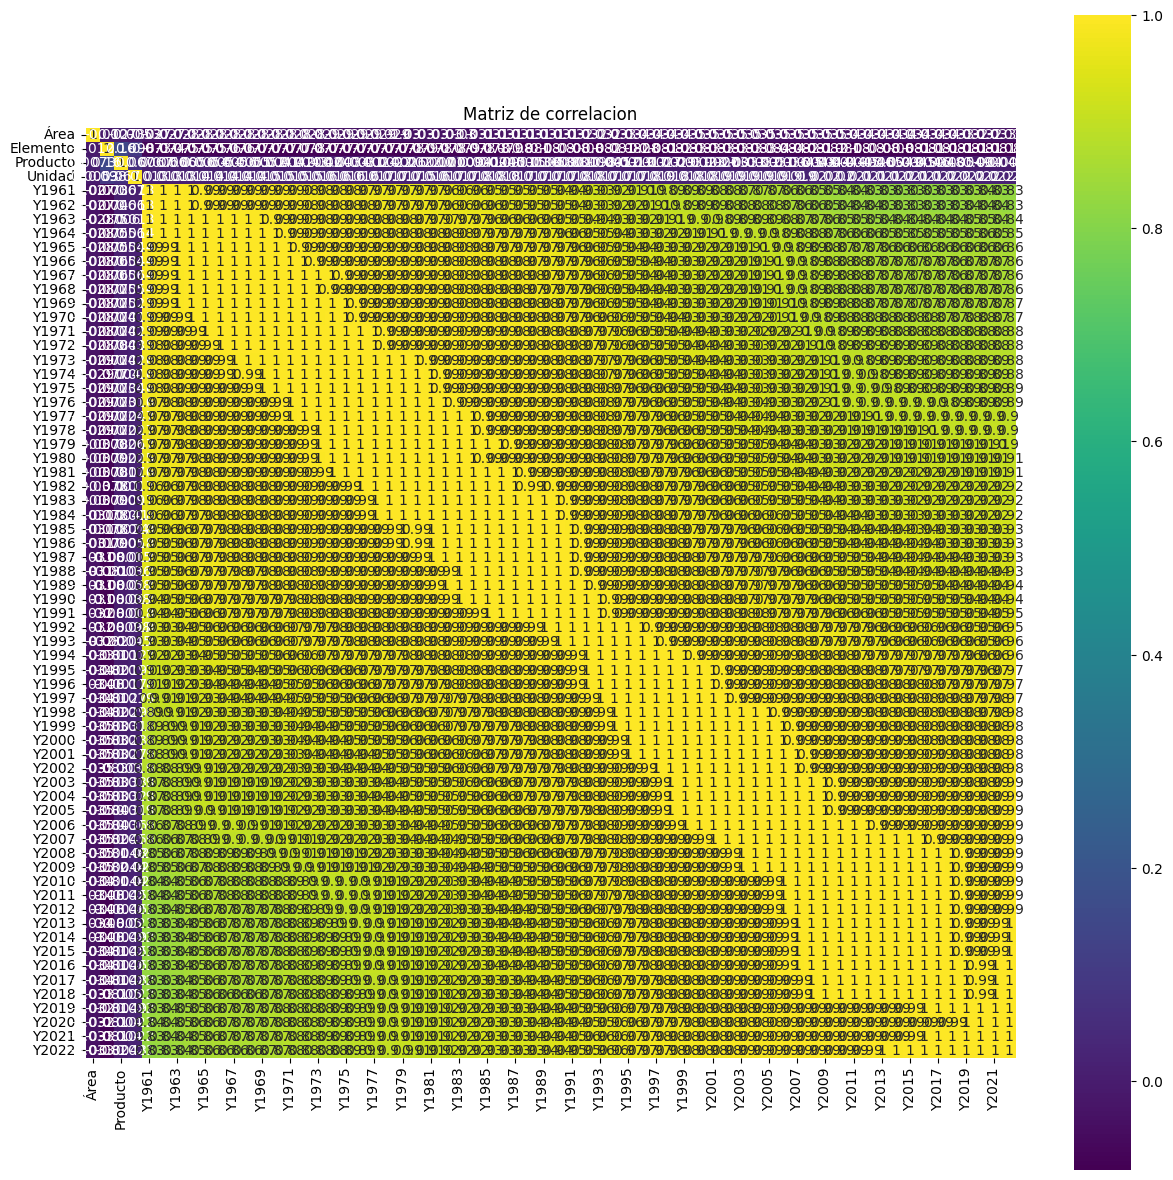

In [ ]:
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap="viridis")
plt.title("Matriz de correlacion", frontsize = 18)
plt.show

In [ ]:
df_corr["Y2022"]=df_corr["Y2022"].astype(int)

In [ ]:
revelation_features=correlation[correlation>.20]

In [ ]:
revelation_features

,Área,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
Área,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elemento,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Producto,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unidad,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y1961,NaN,NaN,NaN,NaN,1.000000,0.999202,0.997736,0.995718,0.994083,0.992203,...,0.826967,0.826296,0.826135,0.828070,0.825836,0.825134,0.833531,0.837662,0.831611,0.825469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y2018,NaN,NaN,NaN,NaN,0.825134,0.829434,0.840262,0.850870,0.860099,0.864102,...,0.998056,0.998233,0.998616,0.998855,0.999472,1.000000,0.997466,0.994648,0.997871,0.998762
Y2019,NaN,NaN,NaN,NaN,0.833531,0.837158,0.845548,0.854877,0.862799,0.866369,...,0.993112,0.993136,0.994023,0.995162,0.996392,0.997466,1.000000,0.998692,0.998673,0.997729
Y2020,NaN,NaN,NaN,NaN,0.837662,0.841090,0.848720,0.856961,0.864373,0.867830,...,0.989303,0.989181,0.990537,0.992157,0.993829,0.994648,0.998692,1.000000,0.998475,0.996169
Y2021,NaN,NaN,NaN,NaN,0.831611,0.835658,0.844896,0.854215,0.862297,0.866318,...,0.993421,0.993791,0.994862,0.995871,0.997370,0.997871,0.998673,0.998475,1.000000,0.999206


In [ ]:
cor_target=abs(correlation["Y2022"])

In [ ]:
cor_target

Área        0.032993
Elemento    0.081937
Producto    0.004264
Unidad      0.021004
Y1961       0.825469
              ...   
Y2018       0.998762
Y2019       0.997729
Y2020       0.996169
Y2021       0.999206
Y2022       1.000000
Name: Y2022, Length: 66, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_class, y_class, test_size=0.1,random_state=7)

In [ ]:
depth = 5
tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=depth)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
subset = np.unique(tree.tree_.feature[tree.tree_.feature >=0])
print(f'variables: {x_class.shape[1]}')
print(f'variables utilizadas: {subset}')
print(f'Trainning: {tree.score(X_train, y_train).round(2)}')
print(f'Test: {tree.score(X_test, y_test).round(2)}')

variables: 65
variables utilizadas: [ 4 15 36 47 57 59 61 62 63 64]
Trainning: 1.0
Test: 0.99


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import Image

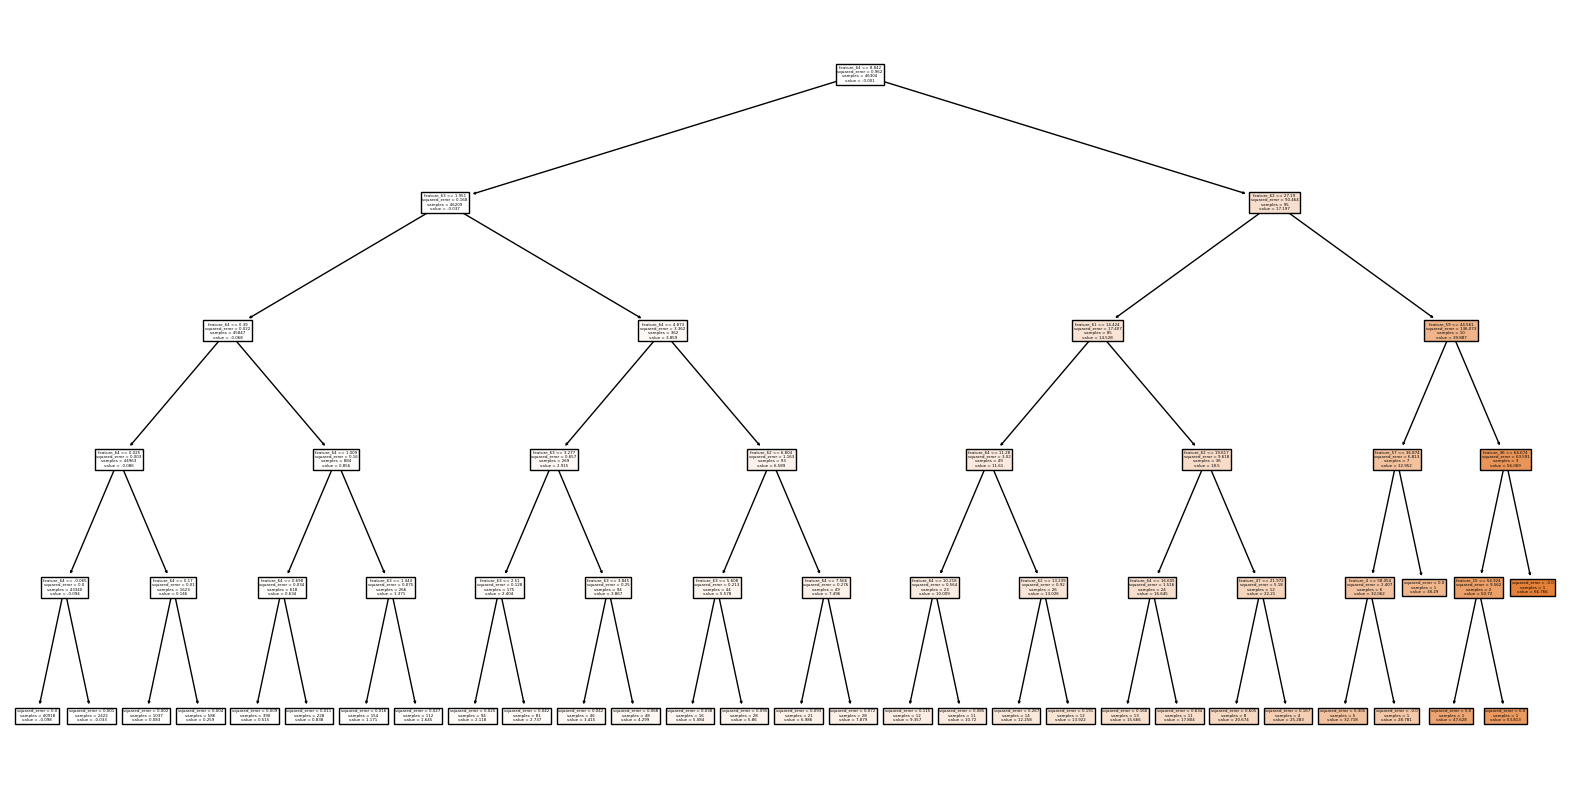

'decision_tree.pdf'

In [ ]:
# Define los nombres de las características
if isinstance(x_class, np.ndarray):
    feature_names = [f'feature_{i}' for i in range(x_class.shape[1])]
else:
    feature_names = x_class.columns.tolist()

# Opción 1: Usando plot_tree de scikit-learn
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()

# Opción 2: Usando export_graphviz y graphviz
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Guarda el árbol como archivo PDF
graph.view()  # Abre el archivo PDF

